# Analyzing World Happiness Report data

### Data context according to Kaggle

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness. [(link)](https://www.kaggle.com/unsdsn/world-happiness)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('./data/2019.csv', index_col=[0,1])
data.head()

,,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,Country or region,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


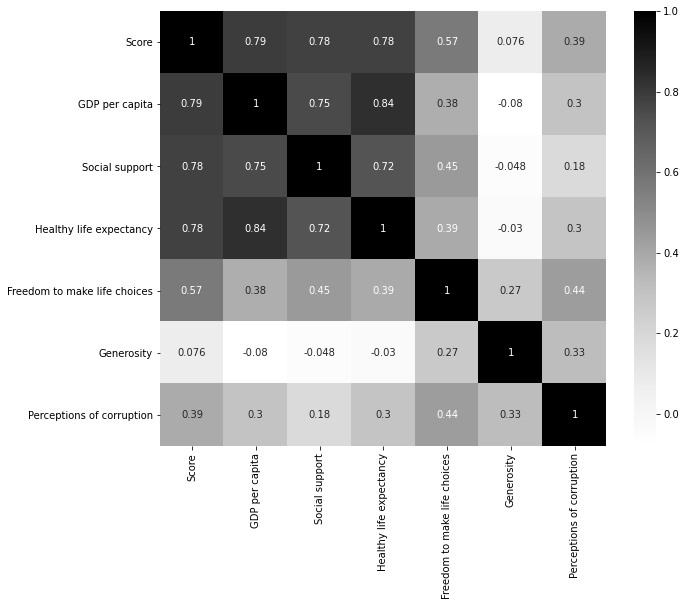

In [2]:
# Examining the correlation between columns with heatmap
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='Greys')

### Findings of correlation between...
**Score and**
* GDP per capita: ***79%***
* Social support: ***78%***
* Healthy life expectancy: ***78%***
* Freedom to make life choices: ***57%***

**GDP per capita and**
* Healthy life expectancy: ***84%***
* Social support: ***75%***

**Social Support and**
* Healthy life expectancy: ***72%***

## Finding the 1st and 2nd most valued (or relevant) factors that contribute to a country's happiness score
I want to find the primary and secondary values a country expresses, and see if whether this contributes to the country's happiness gauge. 

The columns involved in this process would be ```'GDP per capita'``` (Economic factor), ```'Social support'```, ```'Healthy life expectancy'```, ```'Freedom to make life choices'```, ```'Generosity'```, and ```'Perceptions of corruption'``` (to be able to compare the values of this column to the rest, this would be preprocessed as a new column called ```'Trust'```)

In [3]:
data.columns

Index(['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [4]:
cols = list(data.columns)
cols.remove('Score')
cols

['GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [5]:
for i in range(1, len(data)+1):
    
    # Translating 'Perceptions of corruption' to 'Trust'
    data.loc[i, 'Trust'] = 1 - data.loc[i,'Perceptions of corruption'].astype(float).get(0)
    
    # Finding the primary and secondary values per country
    val1 = data.loc[i, cols].idxmax(axis=1).astype(str).get(0)
    val2 = data.loc[i,cols].replace(data.loc[i,cols].values.max(), data.loc[i,cols].values.min()).idxmax(axis=1).astype(str).get(0)
    
    data.loc[i,'Primary Value'] = val1
    data.loc[i,'Secondary Value'] = val2
    
    print(f"Processed: {data.index[i-1][1]}")
    print(f">> 1st: {val1}, 2nd: {val2}\n")

Processed: Finland
>> 1st: Social support, 2nd: GDP per capita

Processed: Denmark
>> 1st: Social support, 2nd: GDP per capita

Processed: Norway
>> 1st: Social support, 2nd: GDP per capita

Processed: Iceland
>> 1st: Social support, 2nd: GDP per capita

Processed: Netherlands
>> 1st: Social support, 2nd: GDP per capita

Processed: Switzerland
>> 1st: Social support, 2nd: GDP per capita

Processed: Sweden
>> 1st: Social support, 2nd: GDP per capita

Processed: New Zealand
>> 1st: Social support, 2nd: GDP per capita

Processed: Canada
>> 1st: Social support, 2nd: GDP per capita

Processed: Austria
>> 1st: Social support, 2nd: GDP per capita

Processed: Australia
>> 1st: Social support, 2nd: GDP per capita

Processed: Costa Rica
>> 1st: Social support, 2nd: GDP per capita

Processed: Israel
>> 1st: Social support, 2nd: GDP per capita

Processed: Luxembourg
>> 1st: GDP per capita, 2nd: Social support

Processed: United Kingdom
>> 1st: Social support, 2nd: GDP per capita

Processed: Irelan

Processed: Zambia
>> 1st: Social support, 2nd: GDP per capita

Processed: Togo
>> 1st: Social support, 2nd: Healthy life expectancy

Processed: India
>> 1st: Social support, 2nd: GDP per capita

Processed: Liberia
>> 1st: Social support, 2nd: Healthy life expectancy

Processed: Comoros
>> 1st: Social support, 2nd: Healthy life expectancy

Processed: Madagascar
>> 1st: Social support, 2nd: Healthy life expectancy

Processed: Lesotho
>> 1st: Social support, 2nd: GDP per capita

Processed: Burundi
>> 1st: Social support, 2nd: Healthy life expectancy

Processed: Zimbabwe
>> 1st: Social support, 2nd: Healthy life expectancy

Processed: Haiti
>> 1st: Social support, 2nd: Healthy life expectancy

Processed: Botswana
>> 1st: Social support, 2nd: GDP per capita

Processed: Syria
>> 1st: GDP per capita, 2nd: Healthy life expectancy

Processed: Malawi
>> 1st: Social support, 2nd: Healthy life expectancy

Processed: Yemen
>> 1st: Social support, 2nd: Healthy life expectancy

Processed: Rwanda
>> 1

In [6]:
# Which pairs of Primary-Secondary values are most prevalent?
pairs = data.groupby(['Primary Value', 'Secondary Value']).size().sort_values(ascending=False)
pairs = pairs.to_frame()
pairs

0
Primary Value  Secondary Value                  
Social support GDP per capita                102
               Healthy life expectancy        32
GDP per capita Social support                 15
Social support Freedom to make life choices    3
GDP per capita Healthy life expectancy         3
Generosity     Freedom to make life choices    1

In [7]:
pairs = pairs.rename(columns={0:'count'})
pairs

count
Primary Value  Secondary Value                    
Social support GDP per capita                  102
               Healthy life expectancy          32
GDP per capita Social support                   15
Social support Freedom to make life choices      3
GDP per capita Healthy life expectancy           3
Generosity     Freedom to make life choices      1

In [8]:
# Finding the average happiness score by value pairs
i = 1
for pv, sv in pairs.index:
    countries = data[(data['Primary Value'] == pv) & (data['Secondary Value'] == sv)]
    avg_pair_score = countries.Score.mean()
    print(f"Pair {i} ({(len(countries)/156)*100:.2f}%)")
    print(f"Primary Value: {pv}, Secondary Value: {sv}")
    print(f"Average Score: {avg_pair_score:.3f}\n")
    i += 1

Pair 1 (65.38%)
Primary Value: Social support, Secondary Value: GDP per capita
Average Score: 5.733

Pair 2 (20.51%)
Primary Value: Social support, Secondary Value: Healthy life expectancy
Average Score: 4.456

Pair 3 (9.62%)
Primary Value: GDP per capita, Secondary Value: Social support
Average Score: 5.790

Pair 4 (1.92%)
Primary Value: Social support, Secondary Value: Freedom to make life choices
Average Score: 4.503

Pair 5 (1.92%)
Primary Value: GDP per capita, Secondary Value: Healthy life expectancy
Average Score: 4.233

Pair 6 (0.64%)
Primary Value: Generosity, Secondary Value: Freedom to make life choices
Average Score: 3.083



## Plotting column relevance for top, middle, bottom ranked countries

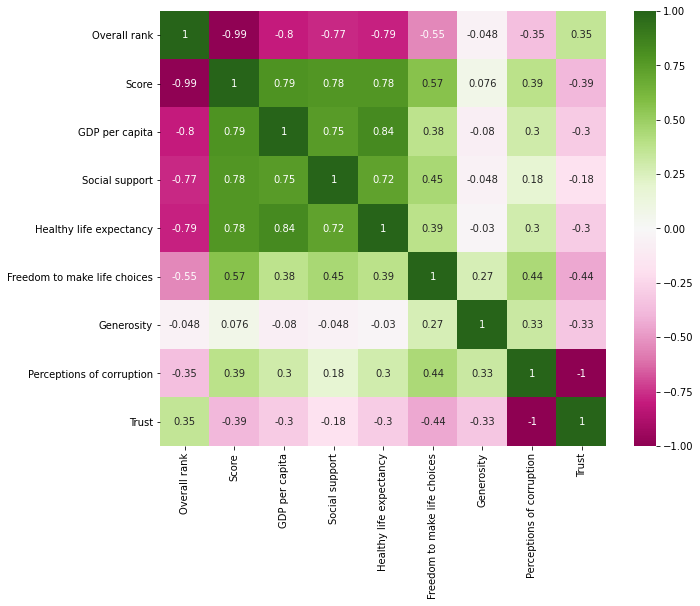

In [9]:
# Seeing the correlation between columns and 'Overall rank'
corr2 = data.reset_index(level=0).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr2, annot=True, cmap='PiYG')

In [10]:
data.sort_values(by=['Overall rank'], inplace=True)
data.Score.describe()

count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500
max        7.769000
Name: Score, dtype: float64

In [11]:
# Dividing the data into 3 classes according to their overall rank
data.loc[data.Score>=6.184500,'Weighed'] = 'Top 25%'
data.loc[(data.Score>4.544500) & (data.Score<6.184500),'Weighed'] = 'Middle 50%'
data.loc[data.Score<=4.544500,'Weighed'] = 'Bottom 25%'
data.head()

,,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Trust,Primary Value,Secondary Value,Weighed
Overall rank,Country or region,,,,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0.607,Social support,GDP per capita,Top 25%
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0.590,Social support,GDP per capita,Top 25%
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0.659,Social support,GDP per capita,Top 25%
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0.882,Social support,GDP per capita,Top 25%
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0.702,Social support,GDP per capita,Top 25%


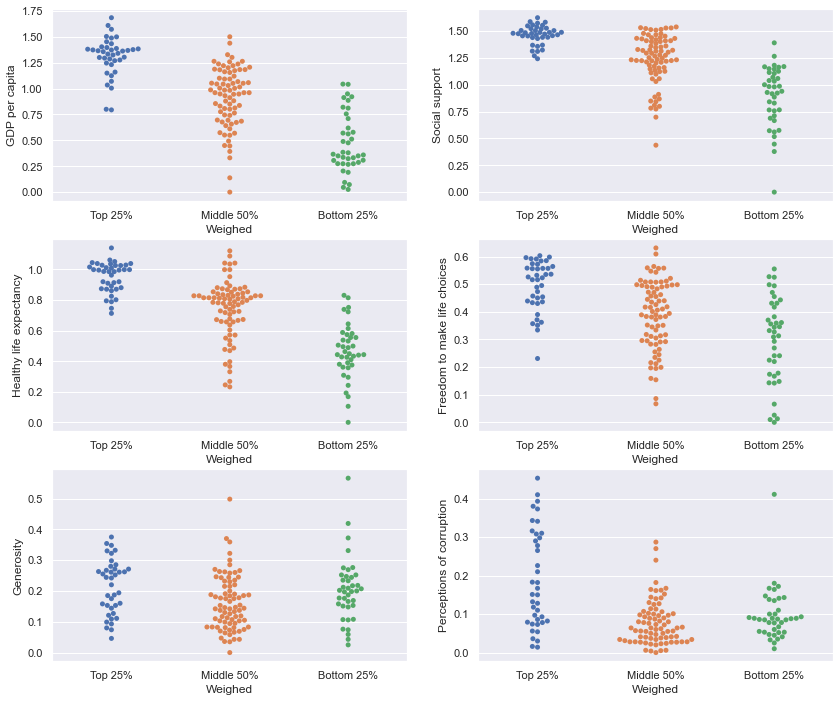

In [12]:
# Plotting each column, separated by class
from pylab import *

sns.set(rc={'figure.figsize': (14,12)})

subplot(3,2,1)
f1 = sns.swarmplot(data=data, x='Weighed', y='GDP per capita')

subplot(3,2,2)
f2 = sns.swarmplot(data=data, x='Weighed', y='Social support')

subplot(3,2,3)
f3 = sns.swarmplot(data=data, x='Weighed', y='Healthy life expectancy')

subplot(3,2,4)
f4 = sns.swarmplot(data=data, x='Weighed', y='Freedom to make life choices')

subplot(3,2,5)
f5 = sns.swarmplot(data=data, x='Weighed', y='Generosity')

subplot(3,2,6)
f6 = sns.swarmplot(data=data, x='Weighed', y='Perceptions of corruption')

plt.show()

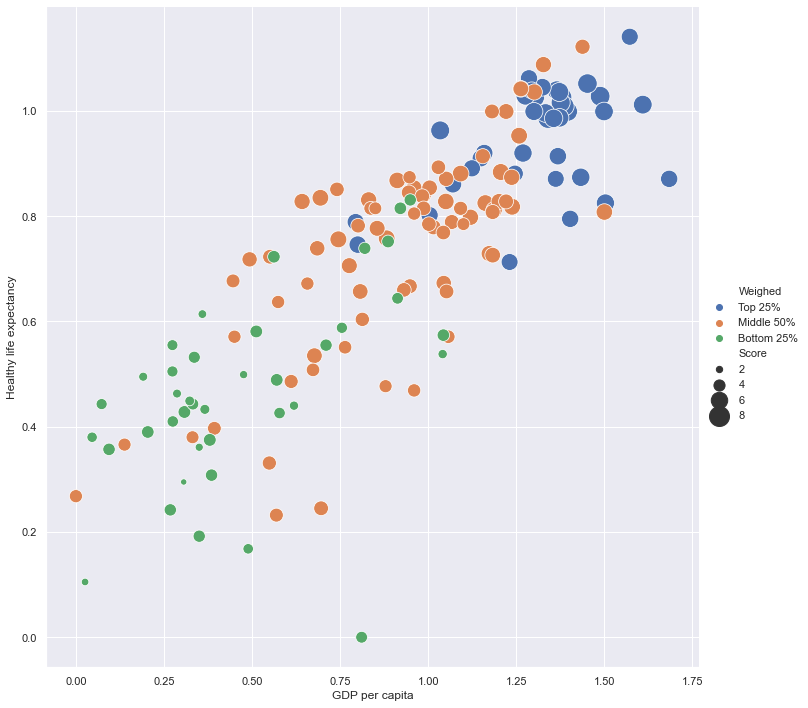

In [13]:
# Plotting the correlation between 'GDP per capita' and
# 'Healthy life expectancy' with rank class and happiness score
sns.relplot(x="GDP per capita", y="Healthy life expectancy", size="Score",  sizes=(40, 400), hue='Weighed', height=10, data=data)

### Findings
1. 'Overall rank' of a country's happiness is highly relevant (& dependent) on GDP per capita, amount of social support, and healthy life expectancy


2. Surprisingly the relation between a country's happiness and their generosity is weak.


3. 'Happier' countries value freedom to make life choices, while this is not so prevalant in average~least happy countries


4. GDP per capita and Healthy life expectancy go hand in hand, with the obvious fact of the 'happier' countries having much higher GDP & longer life expectancy


5. (and extension from #4) There are some outliers within the bottom 25% group, where some of them appear to have higher values in both columns than a few from the top 25%.

**Why are the outliers in the bottom 25% group classified as such when they score high in GDP and life expectancy?**

In [14]:
# Addressing the outliers as the top 10 countries from the bottom 25% group 
# of which have the highest values in the 'GDP per capita' and 'Healthy life expectancy' columns
outliers = data[data.Weighed=='Bottom 25%'].sort_values(by=['GDP per capita', 'Healthy life expectancy'], ascending=False)[:10]
outliers

,,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Trust,Primary Value,Secondary Value,Weighed
Overall rank,Country or region,,,,,,,,,,,
126,Iraq,4.437,1.043,0.980,0.574,0.241,0.148,0.089,0.911,GDP per capita,Social support,Bottom 25%
148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100,0.900,Social support,GDP per capita,Bottom 25%
130,Sri Lanka,4.366,0.949,1.265,0.831,0.470,0.244,0.047,0.953,Social support,GDP per capita,Bottom 25%
124,Tunisia,4.461,0.921,1.000,0.815,0.167,0.059,0.055,0.945,Social support,GDP per capita,Bottom 25%
137,Egypt,4.166,0.913,1.039,0.644,0.241,0.076,0.067,0.933,Social support,GDP per capita,Bottom 25%
119,Georgia,4.519,0.886,0.666,0.752,0.346,0.043,0.164,0.836,GDP per capita,Healthy life expectancy,Bottom 25%
133,Ukraine,4.332,0.820,1.390,0.739,0.178,0.187,0.010,0.990,Social support,GDP per capita,Bottom 25%
135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135,0.865,Social support,GDP per capita,Bottom 25%
140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085,0.915,Social support,GDP per capita,Bottom 25%


In [15]:
happiest = data.sort_values(by='Overall rank')[:10]
happiest

,,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Trust,Primary Value,Secondary Value,Weighed
Overall rank,Country or region,,,,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0.607,Social support,GDP per capita,Top 25%
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0.590,Social support,GDP per capita,Top 25%
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0.659,Social support,GDP per capita,Top 25%
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0.882,Social support,GDP per capita,Top 25%
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0.702,Social support,GDP per capita,Top 25%
6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,0.657,Social support,GDP per capita,Top 25%
7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,0.627,Social support,GDP per capita,Top 25%
8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,0.620,Social support,GDP per capita,Top 25%
9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,0.692,Social support,GDP per capita,Top 25%


In [16]:
cols.append('Trust')
cols.remove('Perceptions of corruption')

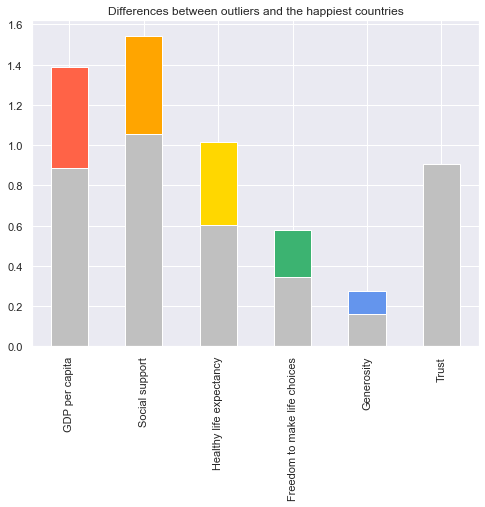

In [65]:
plt.figure(figsize=(8,6))
plt.title('Differences between outliers and the happiest countries')
ax = happiest[cols].mean().plot(kind='bar', color=['tomato', 'orange', 'gold', 'mediumseagreen', 'cornflowerblue', 'violet'])
outliers[cols].mean().plot(ax=ax, kind='bar', color='silver')

### Findings
The differences between the outliers and top happiest countries data are clear; outliers have significantly lower/less GDP, social support, healthy life expectancy, freedom to make life choices, and generosity.

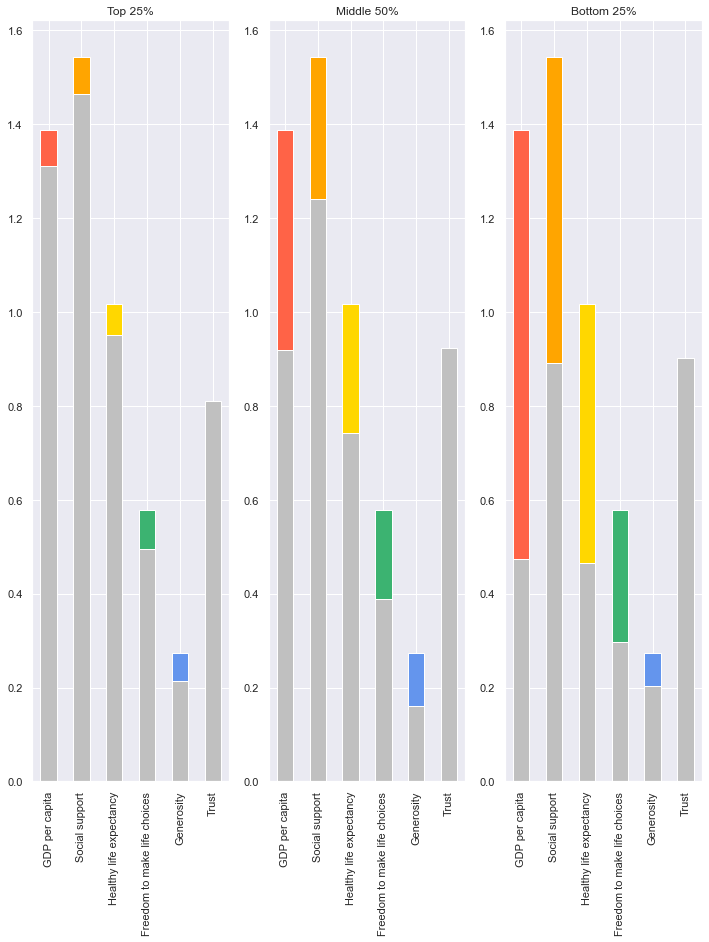

In [92]:
# How about all the other countries, plotted against the happiest countries?
sns.set(rc={'figure.figsize': (12,14)})

subplot(1,3,1)
plt.title('Top 25%')
ax = happiest[cols].mean().plot(kind='bar', color=['tomato', 'orange', 'gold', 'mediumseagreen', 'cornflowerblue', 'violet'])
f1 = data[data.Weighed=='Top 25%'][cols].mean().plot(ax=ax, kind='bar', color='silver')

subplot(1,3,2)
plt.title('Middle 50%')
ax = happiest[cols].mean().plot(kind='bar', color=['tomato', 'orange', 'gold', 'mediumseagreen', 'cornflowerblue', 'violet'])
f2 = data[data.Weighed=='Middle 50%'][cols].mean().plot(ax=ax, kind='bar', color='silver')

subplot(1,3,3)
plt.title('Bottom 25%')
ax = happiest[cols].mean().plot(kind='bar', color=['tomato', 'orange', 'gold', 'mediumseagreen', 'cornflowerblue', 'violet'])
f3 = data[data.Weighed=='Bottom 25%'][cols].mean().plot(ax=ax, kind='bar', color='silver')

plt.show()

## Examining countries with the highest and lowest GDP score in relation to the factor they value

In [122]:
# What do countries with the highest GDP value most?
highest_gdp = data.sort_values(by='GDP per capita', ascending=False)[:30]
highest_gdp[['GDP per capita', 'Primary Value', 'Secondary Value']]

,,GDP per capita,Primary Value,Secondary Value
Overall rank,Country or region,,,
29,Qatar,1.684,GDP per capita,Social support
14,Luxembourg,1.609,GDP per capita,Social support
34,Singapore,1.572,GDP per capita,Social support
21,United Arab Emirates,1.503,GDP per capita,Social support
51,Kuwait,1.500,GDP per capita,Social support
16,Ireland,1.499,Social support,GDP per capita
3,Norway,1.488,Social support,GDP per capita
6,Switzerland,1.452,Social support,GDP per capita
76,Hong Kong,1.438,GDP per capita,Social support


In [131]:
highest_pv = dict(highest_gdp['Primary Value'].value_counts())
highest_sv = dict(highest_gdp['Secondary Value'].value_counts())
print(f"Primary values of countries with the lowest GDP: \n{highest_pv}\n")
print(f"Secondary values of countries with the lowest GDP: \n{highest_sv}")

Primary values of countries with the lowest GDP: 
{'Social support': 22, 'GDP per capita': 8}

Secondary values of countries with the lowest GDP: 
{'GDP per capita': 22, 'Social support': 8}


### Findings
Wow, ALL of the countries with the highest GDP scores have social support and GDP per capita as their primary and secondary values, in whichever order (although most countries prefer social support as their primary value)

In [124]:
# What do countries with the lowest GDP value most?
lowest_gdp = data.sort_values(by='GDP per capita')[:30]
lowest_gdp[['GDP per capita', 'Primary Value', 'Secondary Value']]

,,GDP per capita,Primary Value,Secondary Value
Overall rank,Country or region,,,
112,Somalia,0.000,Social support,Freedom to make life choices
155,Central African Republic,0.026,Generosity,Freedom to make life choices
145,Burundi,0.046,Social support,Healthy life expectancy
141,Liberia,0.073,Social support,Healthy life expectancy
127,Congo (Kinshasa),0.094,Social support,Healthy life expectancy
114,Niger,0.138,Social support,Healthy life expectancy
150,Malawi,0.191,Social support,Healthy life expectancy
123,Mozambique,0.204,Social support,Freedom to make life choices
129,Sierra Leone,0.268,Social support,Freedom to make life choices


In [130]:
lowest_pv = dict(lowest_gdp['Primary Value'].value_counts())
lowest_sv = dict(lowest_gdp['Secondary Value'].value_counts())
print(f"Primary values of countries with the lowest GDP: \n{lowest_pv}\n")
print(f"Secondary values of countries with the lowest GDP: \n{lowest_sv}")

Primary values of countries with the lowest GDP: 
{'Social support': 29, 'Generosity': 1}

Secondary values of countries with the lowest GDP: 
{'Healthy life expectancy': 21, 'GDP per capita': 5, 'Freedom to make life choices': 4}


### Findings
So social support is a popular primary value, but countries with low GDP scores highly value Healthy life expectancy